# Unsupervised Learning

In [78]:
# Now lets do it on a dataset from sklearn other than iris and blobs

from sklearn.datasets import load_digits
digits = load_digits()
data = digits.data
labels_original = digits.target



In [79]:
labels_original.shape

(1797,)

In [80]:
data.shape

(1797, 64)

In [81]:
data[0].shape

(64,)

0
Axes(0.125,0.53;0.133621x0.35)
1
Axes(0.285345,0.53;0.133621x0.35)
2
Axes(0.44569,0.53;0.133621x0.35)
3
Axes(0.606034,0.53;0.133621x0.35)
4
Axes(0.766379,0.53;0.133621x0.35)
5
Axes(0.125,0.11;0.133621x0.35)
6
Axes(0.285345,0.11;0.133621x0.35)
7
Axes(0.44569,0.11;0.133621x0.35)
8
Axes(0.606034,0.11;0.133621x0.35)
9
Axes(0.766379,0.11;0.133621x0.35)


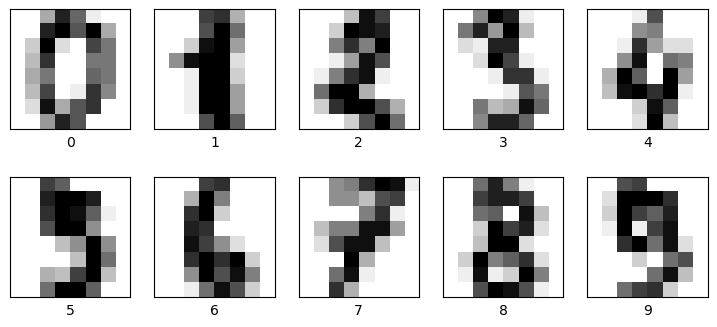

In [82]:
# visualize the first 10 data points

fig, ax = plt.subplots(2, 5, figsize=(9, 4))
for i, axi in enumerate(ax.flat):
    print(i) 
    print(axi)
    axi.imshow(data[i].reshape(8, 8), cmap='binary')
    # cmap='binary' displays the reshaped data as an image in the current subplot using a binary colormap.
    #axi.set(xticks=[], yticks=[])
    #axi.set(xlabel=labels[i])
    axi.set(xticks=[], yticks=[], xlabel=labels_original[i])
plt.show()

In [83]:
# now lets cluster the data without using the labels
kmeans_model_digits = KMeans(n_clusters=10)
kmeans_model_digits.fit(data)

KMeans(n_clusters=10)

In [84]:

# Get the centroids
centroids = kmeans_model_digits.cluster_centers_

# Get the labels
labels_pred = kmeans_model_digits.labels_
print(labels_pred)

[2 7 7 ... 7 4 4]


0
Axes(0.125,0.53;0.168478x0.35)
1
Axes(0.327174,0.53;0.168478x0.35)
2
Axes(0.529348,0.53;0.168478x0.35)
3
Axes(0.731522,0.53;0.168478x0.35)
4
Axes(0.125,0.11;0.168478x0.35)
5
Axes(0.327174,0.11;0.168478x0.35)
6
Axes(0.529348,0.11;0.168478x0.35)
7
Axes(0.731522,0.11;0.168478x0.35)


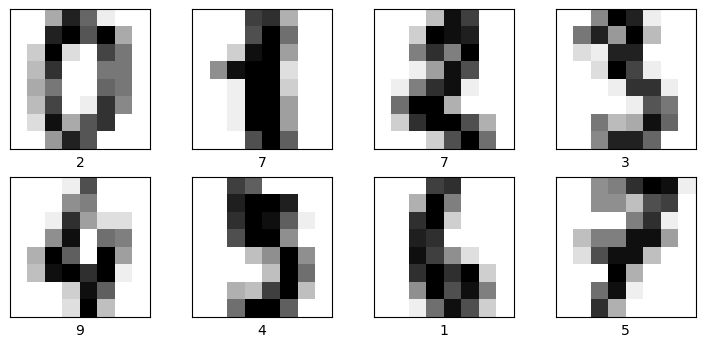

In [89]:
# Plot the first 8 data and there predicted label each data point with its index

fig, ax = plt.subplots(2, 4, figsize=(9, 4))
for i, axi in enumerate(ax.flat):
    print(i)
    print(axi)
    axi.imshow(data[i].reshape(8, 8), cmap='binary')
    axi.set(xticks=[], yticks=[], xlabel=labels_pred[i])
plt.show()


**Inertia (Within-Cluster Sum of Squares)**
- Inertia measures the sum of squared distances between each point and its assigned cluster centroid. 
- It represents how close the data points are within each cluster.
- A lower value indicates better compactness of clusters.

In [93]:
inertia = kmeans_model_digits.inertia_
print("Inertia:", inertia)


Inertia: 1165796.5015699307


The **Silhouette Score** measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

In [94]:
from sklearn.metrics import silhouette_score

# Example: Calculating the Silhouette Score
sil_score = silhouette_score(data, labels_pred)
print("Silhouette Score:", sil_score)

Silhouette Score: 0.18216040399377484


It ranges from -1 to 1:
- 1: Perfect clustering, well separated clusters.
- 0: Overlapping clusters.
- -1: Incorrect clustering.

A higher silhouette score indicates better-defined clusters.

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  14   0   0   0   3   8   1]
 [  0   0   1 157   0   2   0   7   7   9]
 [  0   7   0   0 162   0   0   8   4   0]
 [  0   0   0   0   1 126   1   0   0  54]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   0   0   0   0   0   0 177   2   0]
 [  0   5   3   2   0   5   2   3 103  51]
 [  0  20   0   9   0   5   0   7   2 137]]


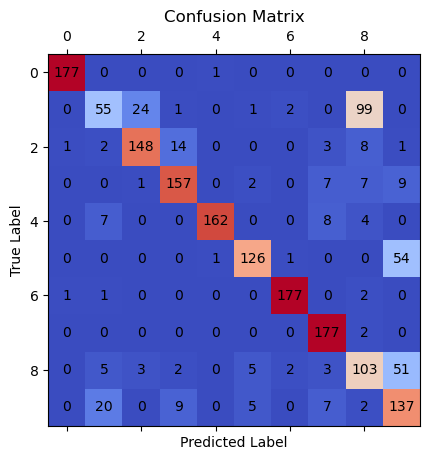

In [92]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(digits.target, predicted_labels)

# Print the confusion matrix
print(conf_matrix)

# Plot the confusion matrix
plt.matshow(conf_matrix, cmap='coolwarm')
for i in range(10):
    for j in range(10):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()